In [1]:
# Import libraries
from qiskit import QuantumCircuit, transpile
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import MCXGate
import matplotlib.pyplot as plt

# Initialize runtime service and backend
service = QiskitRuntimeService()
backend = service.backend(name = "ibm_brisbane")
#backend = service.least_busy(simulator=False, operational=True)

%matplotlib inline

In [3]:
# Function used to show the figure of a circuit, simulate it and display the counts of each state
def circuitResults(title, qc):
    # Show figure of circuit
    fig = qc.draw("mpl")
    fig.suptitle(title)
    plt.show()

    # Simulator
    simulatorUsed = AerSimulator()
    transpiled_circuit = transpile(qc, simulatorUsed)
    result = simulatorUsed.run(transpiled_circuit).result()

    # Get counts of states
    counts = result.get_counts(transpiled_circuit)
    print(counts)

    # Histogram of counts
    plot_histogram(counts)
    plt.show()

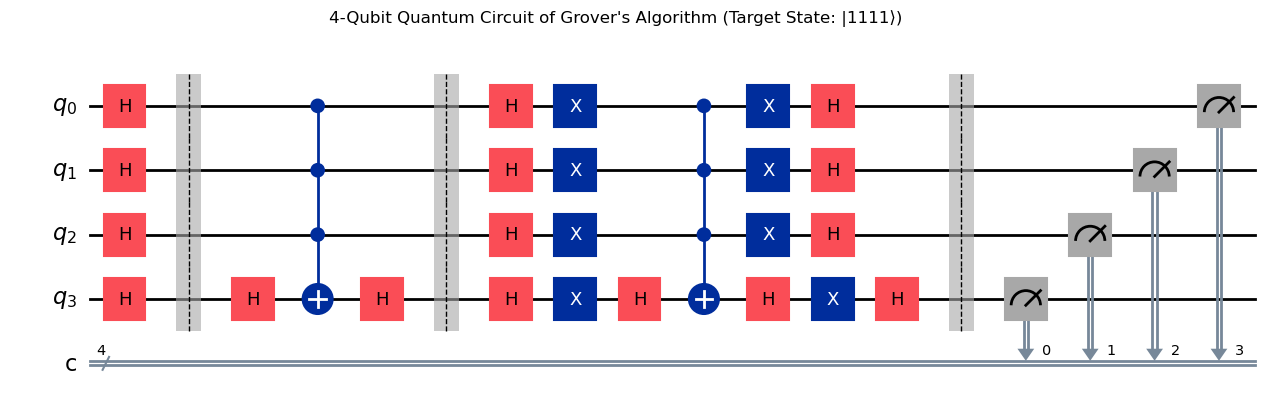

{'1011': 34, '0011': 34, '1111': 502, '0110': 39, '0001': 35, '0111': 26, '1101': 45, '1110': 44, '1010': 37, '1000': 36, '0000': 41, '1001': 28, '1100': 31, '0101': 37, '0010': 29, '0100': 26}


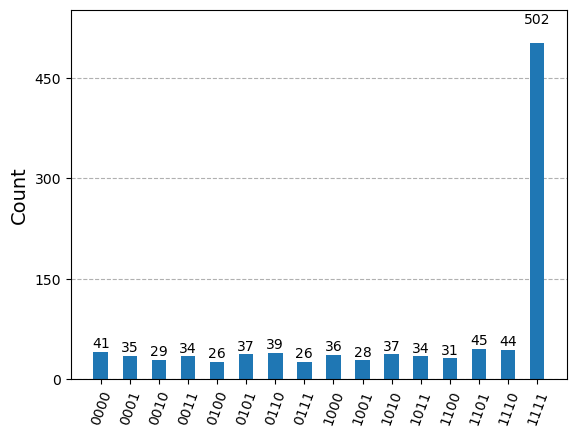

'\nsimulator = Aer.get_backend(\'qasm_simulator\')\ncompiled_circuit = transpile(qc, simulator)\nqobj = assemble(compiled_circuit)\nresult = simulator.run(qobj).result()\ncounts = result.get_counts()\n\n# Display results\nprint("Measurement Results:", counts)\nplot_histogram(counts)\n'

In [7]:
qc = QuantumCircuit(4, 4)   # Initialize 4 qubit and 4 classical bits for recording results

# Create superposition state, |s⟩
qc.h(range(4))

qc.barrier()

# Oracle (Target state of |1111⟩)
qc.h(3)                     # Hadamard on the last qubit
qc.append(MCXGate(3), [0, 1, 2, 3])  # This applies X only if all three control qubits are 1
qc.h(3)                     # Hadamard back

qc.barrier()

# Diffuser (Inversion about the mean)
qc.h(range(4))
qc.x(range(4))
qc.h(3)
qc.append(MCXGate(3), [0, 1, 2, 3])  # This applies X only if all three control qubits are 1
qc.h(3)
qc.x(range(4))
qc.h(range(4))

qc.barrier()

# Map outputs to classical bits
qc.measure([3, 2, 1, 0], [0, 1, 2, 3])  # Reverse the qubit order to ensure correct mapping

circuitResults("4-Qubit Quantum Circuit of Grover's Algorithm (Target State: |1111⟩)", qc)
'''
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)
qobj = assemble(compiled_circuit)
result = simulator.run(qobj).result()
counts = result.get_counts()

# Display results
print("Measurement Results:", counts)
plot_histogram(counts)
'''

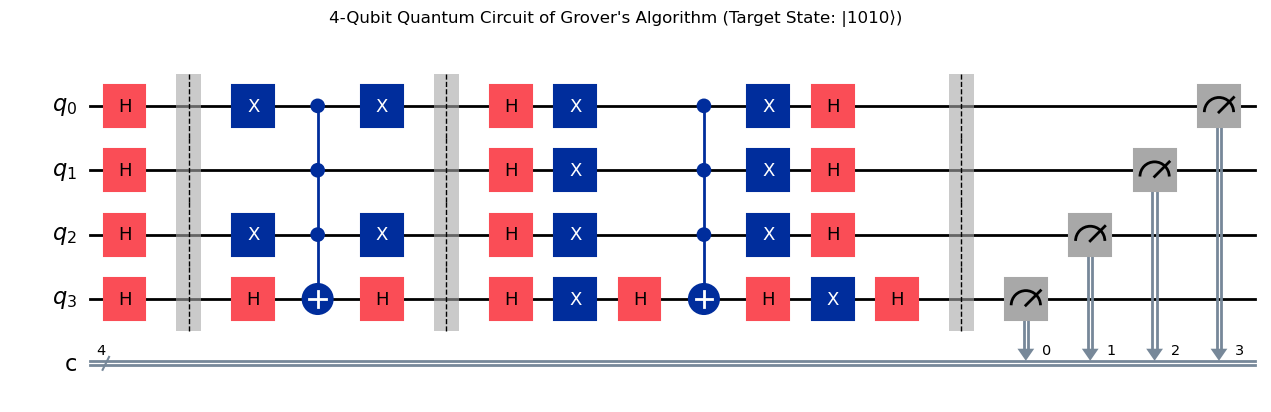

{'0111': 32, '0101': 501, '0110': 42, '1111': 44, '1010': 37, '1001': 32, '0001': 29, '0011': 27, '1100': 34, '1011': 43, '1101': 38, '0000': 35, '0100': 34, '1110': 37, '1000': 33, '0010': 26}


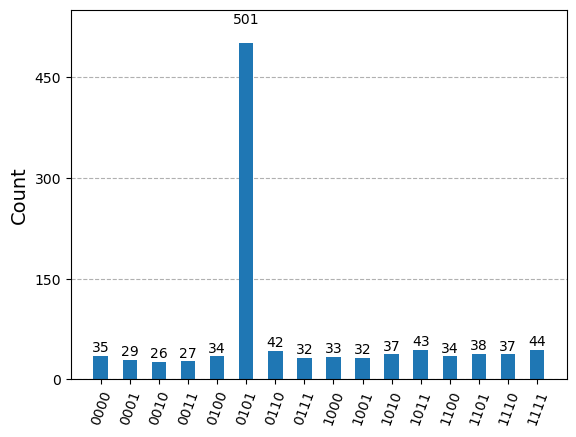

In [6]:
qc = QuantumCircuit(4, 4)   # Initialize 4 qubit and 4 classical bits for recording results

# Create superposition state, |s⟩
qc.h(range(4))

qc.barrier()

# Oracle (Target state of |0101⟩)
qc.x(0)                     # Flip qubit 0 to make |0101⟩ look like |1101⟩
qc.x(2)                     # Flip qubit 2 to make |1101⟩ look like |1111⟩
qc.h(3)                     # Hadamard on the last qubit
qc.append(MCXGate(3), [0, 1, 2, 3])  # Multi-controlled X (flips phase of |1111⟩)
qc.h(3)                     # Hadamard back
qc.x(0)                     # Undo the X on qubit 0
qc.x(2)                     # Undo the X on qubit 2

qc.barrier()

# Diffuser (Inversion about the mean)
qc.h(range(4))
qc.x(range(4))
qc.h(3)
qc.append(MCXGate(3), [0, 1, 2, 3])  # This applies X only if all three control qubits are 1
qc.h(3)
qc.x(range(4))
qc.h(range(4))

qc.barrier()

# Map outputs to classical bits
qc.measure([3, 2, 1, 0], [0, 1, 2, 3])  # Reverse the qubit order to ensure correct mapping

circuitResults("4-Qubit Quantum Circuit of Grover's Algorithm (Target State: |1010⟩)", qc)

Job ID is cyk0vtfnrmz0008tmbxg
{'1100': 285, '1101': 147, '0000': 244, '0100': 414, '1000': 199, '0101': 381, '1001': 206, '0111': 356, '0110': 231, '0011': 232, '1111': 289, '1110': 298, '0001': 158, '0010': 215, '1011': 287, '1010': 154}


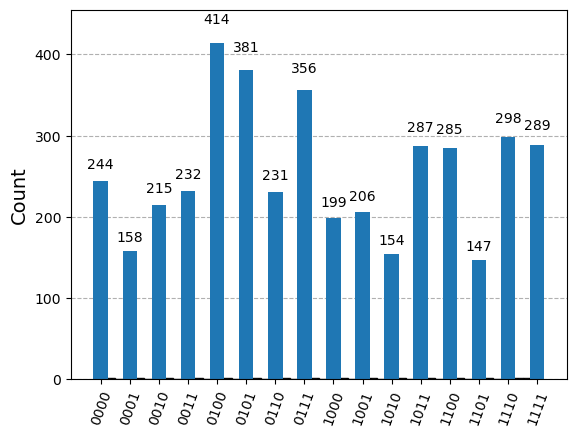

In [9]:
qc = QuantumCircuit(4, 4)   # Initialize 4 qubit and 4 classical bits for recording results

# Create superposition state, |s⟩
qc.h(range(4))

qc.barrier()

# Oracle (Target state of |0101⟩)
qc.x(0)                     # Flip qubit 0 to make |0101⟩ look like |1101⟩
qc.x(2)                     # Flip qubit 2 to make |1101⟩ look like |1111⟩
qc.h(3)                     # Hadamard on the last qubit
qc.append(MCXGate(3), [0, 1, 2, 3])  # Multi-controlled X (flips phase of |1111⟩)
qc.h(3)                     # Hadamard back
qc.x(0)                     # Undo the X on qubit 0
qc.x(2)                     # Undo the X on qubit 2

qc.barrier()

# Diffuser (Inversion about the mean)
qc.h(range(4))
qc.x(range(4))
qc.h(3)
qc.append(MCXGate(3), [0, 1, 2, 3])  # This applies X only if all three control qubits are 1
qc.h(3)
qc.x(range(4))
qc.h(range(4))

qc.barrier()

# Map outputs to classical bits
qc.measure([3, 2, 1, 0], [0, 1, 2, 3])  # Reverse the qubit order to ensure correct mapping

backend = service.least_busy(operational=True, simulator=False)
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
# Step 5: Wait for the job to complete and retrieve the results
sampler = Sampler(backend)
job = sampler.run([isa_circuit])
print(f"Job ID is {job.job_id()}")
# Wait for the job to complete and get the result
job_result = job.result()
pub_result = job_result[0]
# Get the counts from the result
counts = pub_result.data.c.get_counts()
print(f"{counts}")
# Visualize the result
plot_histogram(counts)
plt.hist(counts, bins=30, color='skyblue', edgecolor='black')
plt.show()

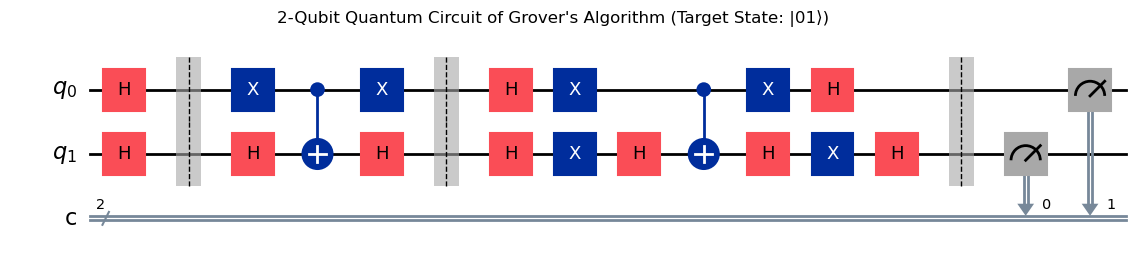

{'01': 1024}


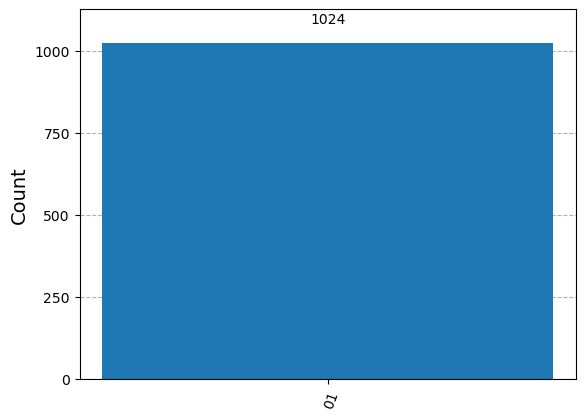

In [4]:
qc = QuantumCircuit(2, 2)   # Initialize 2 qubit and 2 classical bits for recording results

# Step 1: Create Superposition (Hadamard on all qubits)
qc.h(range(2))
qc.barrier()

# Step 2: Oracle (Marking |01⟩)
qc.x(0)                     # Flip qubit 0 to make |01⟩ look like |11⟩
qc.h(1)                     # Hadamard on the last qubit
qc.append(MCXGate(1), [0, 1])  # Multi-controlled X (flips phase of |11⟩)
qc.h(1)                     # Hadamard back
qc.x(0)                     # Undo the X on qubit 0

qc.barrier()

# Step 3: Diffuser (Inversion about the mean)
qc.h(range(2))
qc.x(range(2))
qc.h(1)
qc.append(MCXGate(1), [0, 1])  # This applies X only if all qubits are 1
qc.h(1)
qc.x(range(2))
qc.h(range(2))

qc.barrier()

# Step 4: Measurement
qc.measure([1, 0], [0, 1])  # Reverse order for correct mapping

circuitResults("2-Qubit Quantum Circuit of Grover's Algorithm (Target State: |01⟩)", qc)

Job ID is cyrtpvvr32sg008abj10
{'01': 3636, '11': 214, '00': 205, '10': 41}


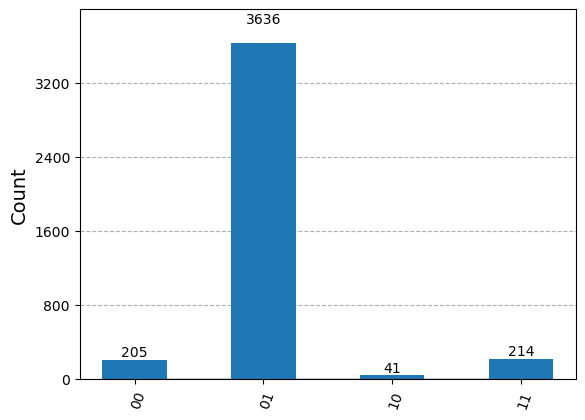

In [5]:
qc = QuantumCircuit(2, 2)   # Initialize 2 qubit and 2 classical bits for recording results

# Step 1: Create Superposition (Hadamard on all qubits)
qc.h(range(2))
qc.barrier()

# Step 2: Oracle (Marking |01⟩)
qc.x(0)                     # Flip qubit 0 to make |01⟩ look like |11⟩
qc.h(1)                     # Hadamard on the last qubit
qc.append(MCXGate(1), [0, 1])  # Multi-controlled X (flips phase of |11⟩)
qc.h(1)                     # Hadamard back
qc.x(0)                     # Undo the X on qubit 0

qc.barrier()

# Step 3: Diffuser (Inversion about the mean)
qc.h(range(2))
qc.x(range(2))
qc.h(1)
qc.append(MCXGate(1), [0, 1])  # This applies X only if all qubits are 1
qc.h(1)
qc.x(range(2))
qc.h(range(2))

qc.barrier()

# Step 4: Measurement
qc.measure([1, 0], [0, 1])  # Reverse order for correct mapping

backend = service.least_busy(operational=True, simulator=False)
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
# Step 5: Wait for the job to complete and retrieve the results
sampler = Sampler(backend)
job = sampler.run([isa_circuit])
print(f"Job ID is {job.job_id()}")
# Wait for the job to complete and get the result
job_result = job.result()
pub_result = job_result[0]
# Get the counts from the result
counts = pub_result.data.c.get_counts()
print(f"{counts}")
# Visualize the result
plot_histogram(counts)
plt.hist(counts, bins=30, color='skyblue', edgecolor='black')
plt.show()